In [58]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
# plt.rcParams['figure.figsize'] = (16, 9)

In [76]:
data = pd.read_excel('指标更新后.xlsx')
data

,店铺id,店铺,卖家信用,距今天数,描述相符,服务态度,店铺收藏数,物流服务,宝贝数,好评率,...,评价数中位数,价格均值,平均月销量,商品最低价,发货时间,公益宝贝计划,交易成功比率,7天上新数,30天销售额,销售环比
0,2639837995,三木子快时尚女装,20,2112,4.70,4.80,9066945,4.80,6726,0.9923,...,1045.5,31.780600,1150.172000,9.80,3.0,53934.666667,0.733164,0.0,1407100.00,0.010000
1,2498512100,下架学姐XJXJ,20,2267,4.80,4.80,5247750,4.80,7693,0.9945,...,710.5,33.742000,842.812000,9.98,5.0,0.000000,0.714085,1629.0,9960700.00,0.010000
2,2533553115,左小姐来了,20,2237,4.70,4.70,4071101,4.70,6841,0.9905,...,280.5,30.214700,452.284000,9.90,5.0,0.000000,0.688849,0.0,412500.00,0.010000
3,275097852,兔先森的原创小铺,18,3211,4.80,4.80,2809809,4.80,633,0.9964,...,157.5,102.750000,198.842000,39.00,2.0,157.140000,0.790634,64.0,7849300.00,-0.230000
4,2636225327,二更大码男装原创工作室,19,2133,4.80,4.84,2705963,4.84,922,0.9949,...,98.0,69.590200,461.806000,10.00,3.0,0.000000,0.797297,17.0,209800.00,-0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,3010242861,峻哲男装服饰店,9,1721,4.68,4.74,105,4.76,8,0.9678,...,3.0,19.875000,2516.750000,9.90,2.0,0.000000,0.884615,50.0,967400.00,-0.280000
223,2209795029305,木子服饰网批,10,221,4.36,4.47,93,4.53,179,0.9782,...,3.0,22.552212,15.951923,9.80,3.0,2.730000,0.643793,0.0,8071.52,0.540808
224,2210228542894,喜儿品质服饰,9,183,4.52,4.63,12,4.67,27,0.9788,...,46.5,148.292105,9659.394737,116.90,3.0,0.000000,0.998710,0.0,16400.00,0.395378
225,387648032,蓝艺韩式女装,15,3092,4.63,4.73,2,4.75,240,0.9742,...,1.0,37.653793,48.089655,14.80,2.0,0.000000,0.833333,7.0,663600.00,-0.290000


In [77]:
del data['店铺id']
del data['店铺']

In [84]:
data = data[['卖家信用','距今天数','描述相符','服务态度','店铺收藏数','物流服务','宝贝数','好评率','保证金','收藏数中位数','评价数中位数','价格均值','平均月销量','商品最低价','发货时间','公益宝贝计划','交易成功比率','7天上新数','30天销售额','销售环比']]
data

,卖家信用,距今天数,描述相符,服务态度,店铺收藏数,物流服务,宝贝数,好评率,保证金,收藏数中位数,评价数中位数,价格均值,平均月销量,商品最低价,发货时间,公益宝贝计划,交易成功比率,7天上新数,30天销售额,销售环比
0,20,2112,4.70,4.80,9066945,4.80,6726,0.9923,80000.00,3428,1045.5,31.780600,1150.172000,9.80,3.0,53934.666667,0.733164,0.0,1407100.00,0.010000
1,20,2267,4.80,4.80,5247750,4.80,7693,0.9945,1000000.00,2767,710.5,33.742000,842.812000,9.98,5.0,0.000000,0.714085,1629.0,9960700.00,0.010000
2,20,2237,4.70,4.70,4071101,4.70,6841,0.9905,200000.00,1226,280.5,30.214700,452.284000,9.90,5.0,0.000000,0.688849,0.0,412500.00,0.010000
3,18,3211,4.80,4.80,2809809,4.80,633,0.9964,11000.00,146,157.5,102.750000,198.842000,39.00,2.0,157.140000,0.790634,64.0,7849300.00,-0.230000
4,19,2133,4.80,4.84,2705963,4.84,922,0.9949,41875.38,117,98.0,69.590200,461.806000,10.00,3.0,0.000000,0.797297,17.0,209800.00,-0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,9,1721,4.68,4.74,105,4.76,8,0.9678,2000.00,15,3.0,19.875000,2516.750000,9.90,2.0,0.000000,0.884615,50.0,967400.00,-0.280000
223,10,221,4.36,4.47,93,4.53,179,0.9782,2020.00,4,3.0,22.552212,15.951923,9.80,3.0,2.730000,0.643793,0.0,8071.52,0.540808
224,9,183,4.52,4.63,12,4.67,27,0.9788,2000.00,0,46.5,148.292105,9659.394737,116.90,3.0,0.000000,0.998710,0.0,16400.00,0.395378
225,15,3092,4.63,4.73,2,4.75,240,0.9742,2100.00,12,1.0,37.653793,48.089655,14.80,2.0,0.000000,0.833333,7.0,663600.00,-0.290000


In [35]:
data.to_excel('数值型.xlsx')

In [64]:
data = data.dropna()
del data['店铺id']
del data['店铺']

KeyError: '店铺id'

In [80]:
data = data.dropna()

In [88]:


# 获得半月形的数据集
# X, y = make_moons(n_samples=100, random_state=123)
#
# 建立目标维度为2的RBF模型
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

# 使用KPCA降低数据维度，直接获得投影后的坐标
X_skernpca = scikit_kpca.fit_transform(data)
X_skernpca
# 数据可视化
# plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
# plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.tight_layout()
# plt.show()
# X_skernpca

array([[-3.54018979e-04,  4.13541074e-03],
       [-1.93782872e-02, -6.78603534e-02],
       [-5.80857894e-03, -3.28240093e-02],
       [ 4.07343321e-02, -1.18537545e-02],
       [-5.78388288e-02, -9.18925664e-02],
       [ 3.05004281e-02, -3.89498159e-03],
       [-5.73947025e-02,  1.99833581e-02],
       [-2.58457113e-02,  1.12033751e-01],
       [-3.04071909e-02, -1.24145994e-02],
       [ 6.04281926e-02,  2.21315872e-02],
       [ 2.66382747e-02,  6.26710794e-02],
       [ 3.02083067e-02,  3.41083637e-02],
       [ 7.00767110e-02, -4.87270930e-02],
       [-4.46845981e-03, -3.89491751e-02],
       [-6.24645954e-02,  6.20490811e-02],
       [-9.36598908e-03, -2.19986259e-02],
       [-2.22976693e-03,  9.18033746e-02],
       [-1.20012408e-02,  3.07737444e-01],
       [-1.42968277e-02, -8.65860031e-03],
       [-1.18048813e-01, -2.88999292e-02],
       [-2.37048277e-02, -2.41255348e-02],
       [-3.07355121e-02, -2.29175203e-02],
       [-1.30196507e-01, -1.76470560e-01],
       [ 4.

In [89]:
X = pd.DataFrame(X_skernpca,columns=['V1','V2'])

In [90]:
X.to_excel('KPCA二维坐标1.xlsx')

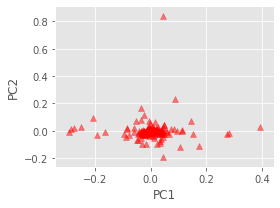

In [72]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.scatter(X['V1'].values, X['V2'].values, color='red', marker='^', alpha=0.5)
# plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

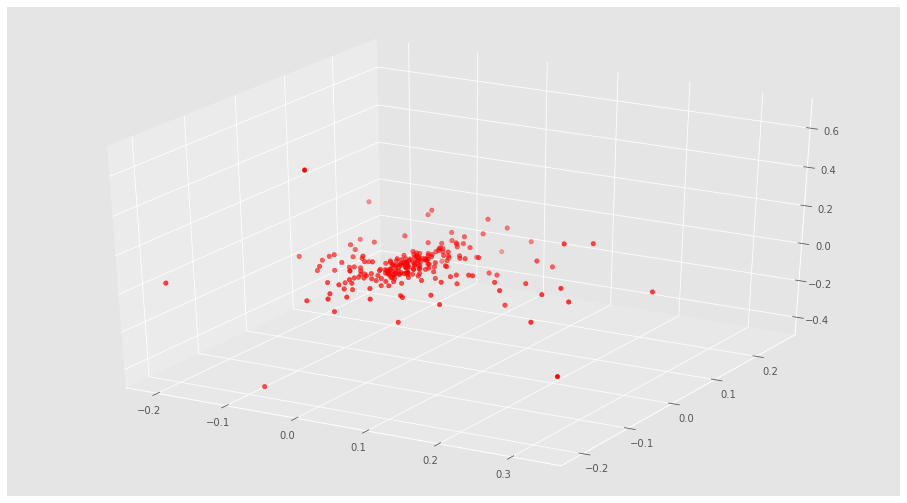

In [87]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['V1'].values, X['V2'].values, X['V3'].values, s=20, c='r', marker='o')